In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import geopandas as gpd;
import plotly.express as px;
import plotly.graph_objects as go;

# Defining Functions

In [2]:
# Function to create Choropleth map to show country of origin for wines reviewed.
def map_origin_countries(data):
    data_countries_count = data['country'].value_counts()
    
    # Mapping dictionary to update country names to match 
    country_mapping = {
        'US': 'United States of America',
        'England': 'United Kingdom',  # Assuming 'England' is used for the United Kingdom
        'Czech Republic': 'Czechia',  # Updated name for Czech Republic
        'Bosnia and Herzegovina': 'Bosnia and Herz.', # Updated name for Czech Republic
        'Macedonia': 'North Macedonia'
    }

    # Replace country names using the mapping dictionary
    data_countries_count.rename(country_mapping, inplace = True)
    
    # Load the world map data
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Merge the world map with the data
    world = world.merge(pd.DataFrame(data_countries_count), how='left', left_on='name', right_on=data_countries_count.index)
    
    # Plot Choropleth Map
    fig = go.Figure(data=go.Choropleth(
        locations = world['iso_a3'],
        z = world['count'],
        text = world['name'],
        colorscale = 'Reds',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_title = 'Number of<br>Wines Reviewed',
    ))

    fig.update_layout(
        title_text='Country of Origin of Wines Reviewed',
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
                CIA World Factbook</a>',
            showarrow = False
        )]
    )

    fig.update_layout(
        margin=dict(l=10, r=10, b=0, t=50), width=1100, height=700)

    fig.show()

In [3]:
def create_provincial_bar(data, country_name):
    data_temp = data.copy()
    data_temp = data_temp[data_temp['country'] == country_name]
    provincial_instances = data_temp.groupby(by='province').size().sort_values(ascending=False)
    
    plt.figure(figsize=(12,7))
    plt.bar(provincial_instances.index, provincial_instances.values, width = 0.5)
    plt.title(f'Provincial Origin of Wines Reviewed in {country_name}')
    plt.xlabel('Province/State')
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    plt.show()

In [4]:
def create_bar(data, col):
    
    instances = data.copy().groupby(by=col).size().sort_values(ascending=False)
    
    plt.figure(figsize=(12,7))
    plt.bar(instances.index, instances.values, width = 0.5)
    plt.title(f'Wines Reviewed by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    plt.show()

# Import Data

In [5]:
taster_df = pd.read_csv('./winemag-data-130k-v2.csv', index_col=0)

In [8]:
taster_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [9]:
taster_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


A lot of missing / null values in both data sets in both sets. Not all features will be relevant to the project task, so after a layer of feature selection, we can remove all nulls.

# Data Exploration and Visualizations

## Numeric/Continuous Feature Analysis

In [13]:
taster_df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


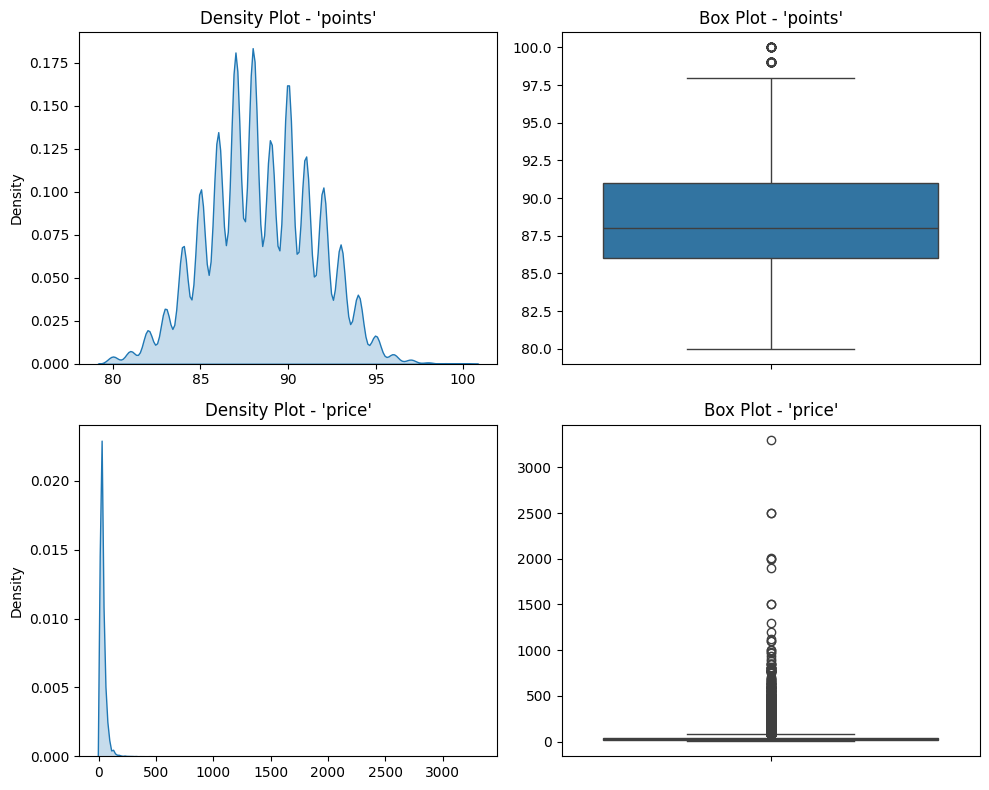

In [14]:
points_Array_taster_df = np.array(taster_df['points'])
price_Array_taster_df = np.array(taster_df['price'])

# Create plot grid
fig, axes = plt.subplots(2,2, figsize = (10,8))

# Plot Density for 'points'
sns.kdeplot(points_Array_taster_df, fill=True ,ax = axes[0,0])
axes[0,0].set_title("Density Plot - 'points'")

# Plot the box plot for 'points'
sns.boxplot(points_Array_taster_df, ax=axes[0, 1])
axes[0, 1].set_title("Box Plot - 'points'")

# Plot the density plot for 'price'
sns.kdeplot(price_Array_taster_df, fill=True ,ax=axes[1, 0])
axes[1, 0].set_title("Density Plot - 'price'")

# Plot the box plot for Attribute2
sns.boxplot(price_Array_taster_df, ax=axes[1, 1])
axes[1, 1].set_title("Box Plot - 'price'")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

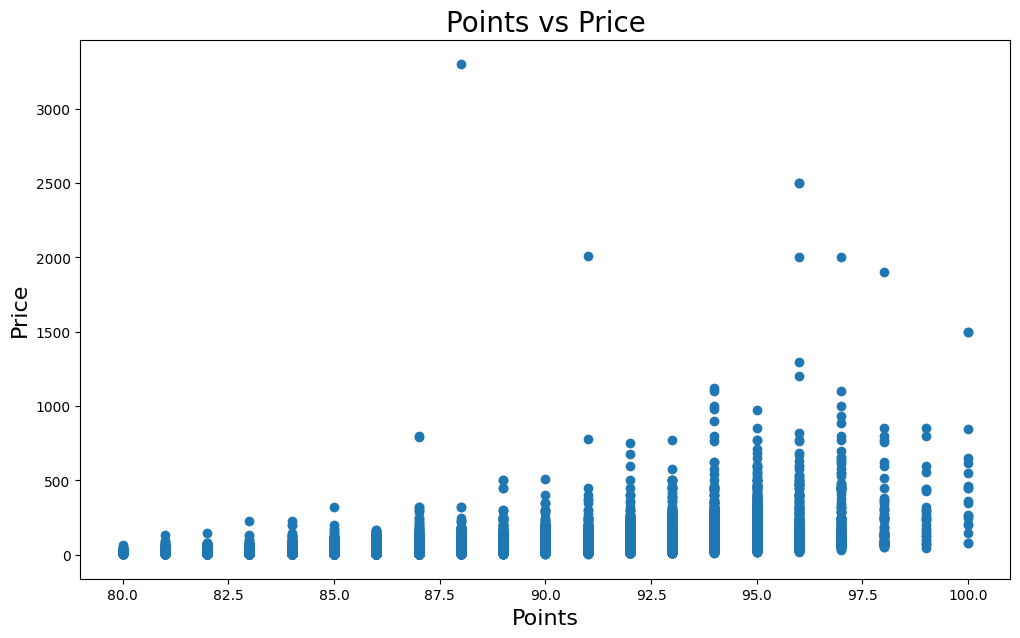

In [15]:
plt.figure(figsize=(12,7))
plt.scatter(np.array(taster_df.points),np.array(taster_df.price))
plt.title('Points vs Price', fontsize = 20)
plt.xlabel('Points', fontsize = 16)
plt.ylabel('Price', fontsize = 16)
plt.show()

<b>Observations:</b>
* 'points' values lie between 80 and 100 in both data sets

## Discrete Feature Analysis - taster_df (taster dataset)

### Wines

In [39]:
len(set(taster_df.title))

118840

In [41]:
wine_instances = taster_df.copy().groupby(by='title').size().sort_values(ascending=False)
wine_instances

title
Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                        11
Korbel NV Brut Sparkling (California)                                          9
Segura Viudas NV Extra Dry Sparkling (Cava)                                    8
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)                           7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                        7
                                                                              ..
Dutton-Goldfield 2014 Angel Camp Vineyard Pinot Noir (Anderson Valley)         1
Dutton-Goldfield 2013 McDougall Vineyard Pinot Noir (Fort Ross-Seaview)        1
Dutton-Goldfield 2013 Fox Den Vineyard Pinot Noir (Green Valley)               1
Dutton-Goldfield 2013 Dutton Ranch Rued Vineyard Chardonnay (Green Valley)     1
Štoka 2011 Izbrani Teran (Kras)                                                1
Length: 118840, dtype: int64

In [69]:
len(wine_instances.index)

118840

### Country

In [16]:
map_origin_countries(taster_df)

/var/folders/20/g71q1f5n1ml1vv9pkb85ps000000gn/T/ipykernel_11604/2050190625.py:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [44]:
# Get list of top 10 wine producing countries in data
top_producing_countries = [i for i in taster_df.copy().groupby(by='country').size().sort_values(ascending=False).index[:10]]
top_producing_countries

['US',
 'France',
 'Italy',
 'Spain',
 'Portugal',
 'Chile',
 'Argentina',
 'Austria',
 'Australia',
 'Germany']

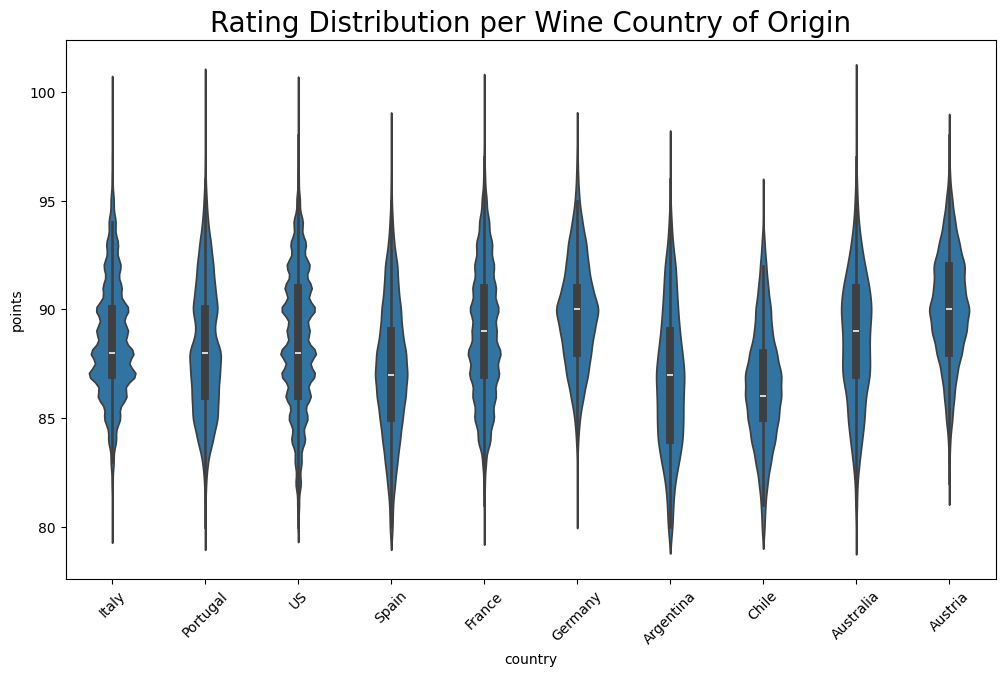

In [53]:
temp_df = taster_df.copy()[taster_df.copy()['country'].isin(top_producing_countries)]

plt.figure(figsize=(12,7))
sns.violinplot(data = temp_df, x="country", y = "points", width=0.5)
plt.title("Rating Distribution per Wine Country of Origin",fontsize=20)
plt.xticks(rotation=45)
plt.show()

### Province

The US, France, and Italy are overwhelmingly the largest producers of wines reviewed in the data set. Let's see the provincial break down for each of these countries.

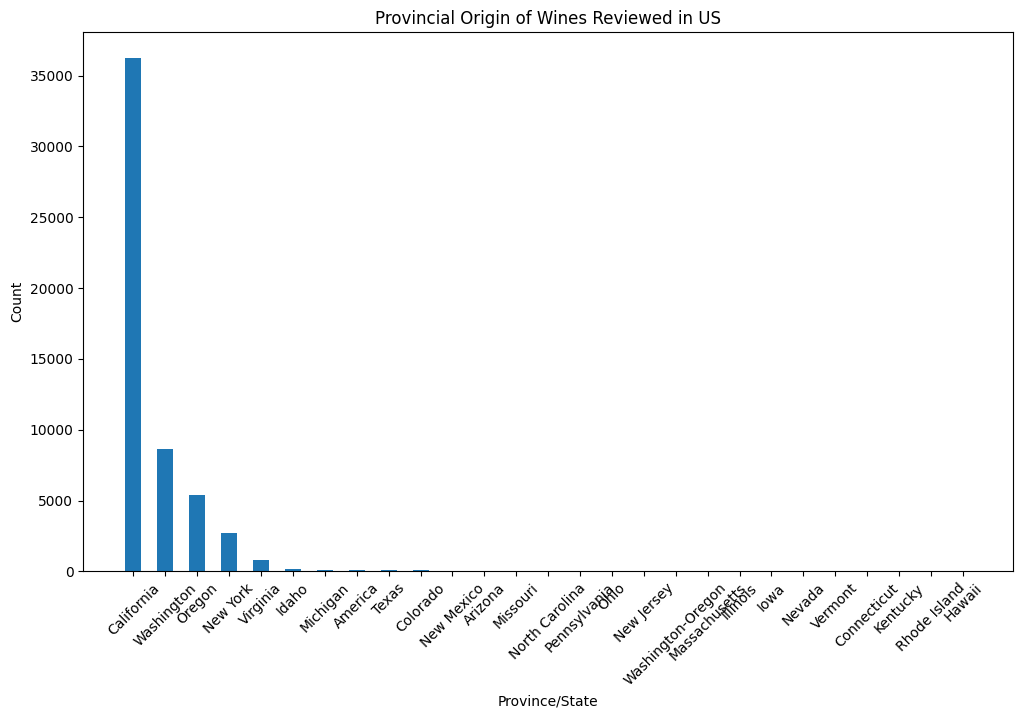

In [17]:
create_provincial_bar(taster_df, 'US')

In [18]:
# Show relationship between State and Rating
top_states = ['California', 'Washingtion', 'Oregon', 'New York', 'Virginia']

print('State',' '*2,'|',' '*2,'Average Rating')
for state in top_states:
    temp = taster_df.copy()
    temp = temp[temp['province']==state]
    state_average_rating = np.mean(temp['points'])
    print(state,' '*2, '|', ' '*2,'{:.2f}'.format(state_average_rating))


State    |    Average Rating
California    |    88.63
Washingtion    |    nan
Oregon    |    89.05
New York    |    87.18
Virginia    |    85.61


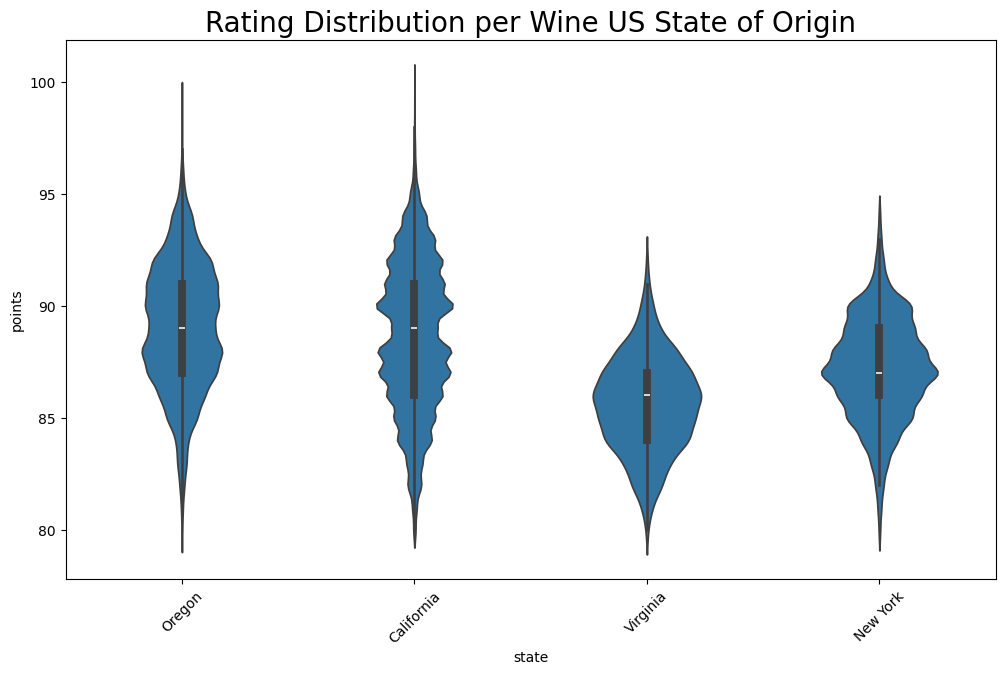

In [58]:
temp_df = taster_df.copy()[(taster_df.copy()['country']=='US') & (taster_df.copy()['province'].isin(top_states))]

plt.figure(figsize=(12,7))
sns.violinplot(data = temp_df, x="province", y = "points", width=0.5)
plt.title("Rating Distribution per Wine US State of Origin",fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('state')
plt.show()

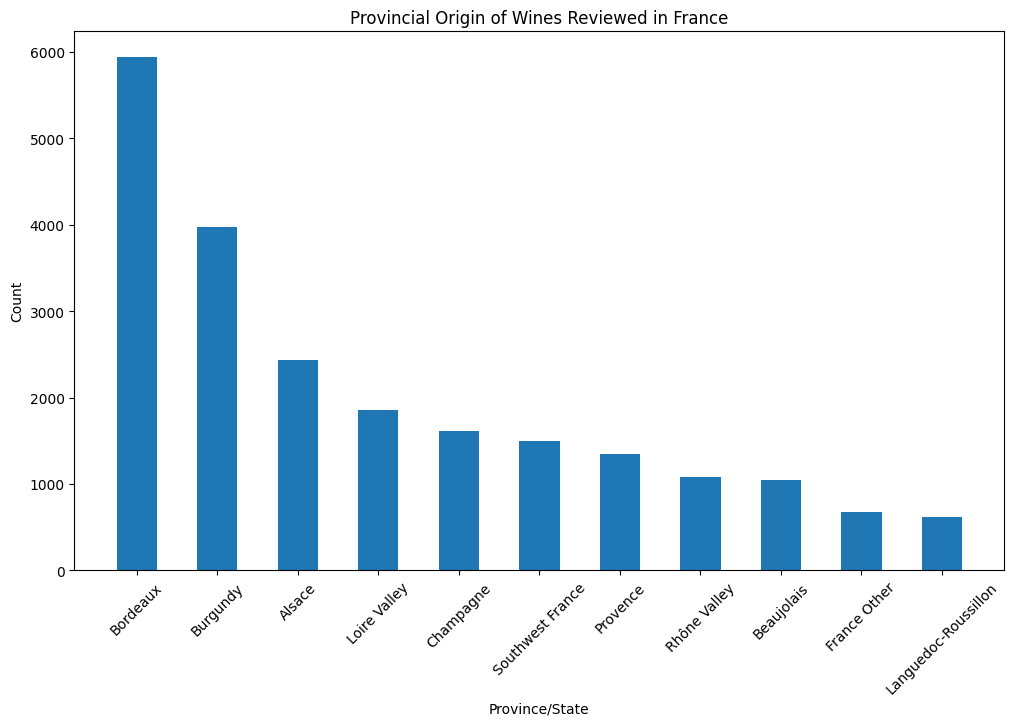

In [19]:
create_provincial_bar(taster_df, 'France')

In [20]:
# Show relationship between Province and Rating
france_provinces = taster_df.copy()[taster_df.copy()['country']=='France']['province'].unique()

print('Province',' '*2,'|',' '*2,'Average Rating')
for province in france_provinces:
    temp = taster_df.copy()
    temp = temp[temp['province']==province]
    province_average_rating = np.mean(temp['points'])
    print(province,' '*2, '|', ' '*2,'{:.2f}'.format(province_average_rating))

Province    |    Average Rating
Alsace    |    89.37
Beaujolais    |    87.95
Bordeaux    |    88.66
Champagne    |    90.23
Burgundy    |    89.57
France Other    |    86.47
Southwest France    |    88.61
Rhône Valley    |    89.01
Languedoc-Roussillon    |    87.09
Provence    |    88.21
Loire Valley    |    88.49


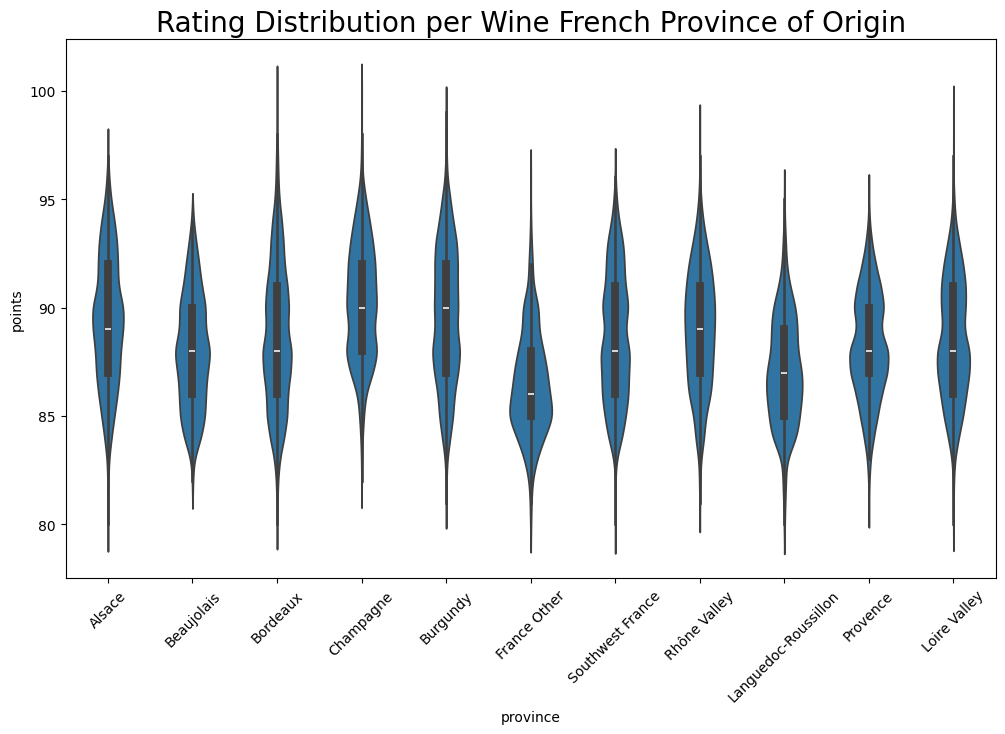

In [56]:
temp_df = taster_df.copy()[taster_df.copy()['country']=='France']

plt.figure(figsize=(12,7))
sns.violinplot(data = temp_df, x="province", y = "points", width=0.5)
plt.title("Rating Distribution per Wine French Province of Origin",fontsize=20)
plt.xticks(rotation=45)
plt.show()

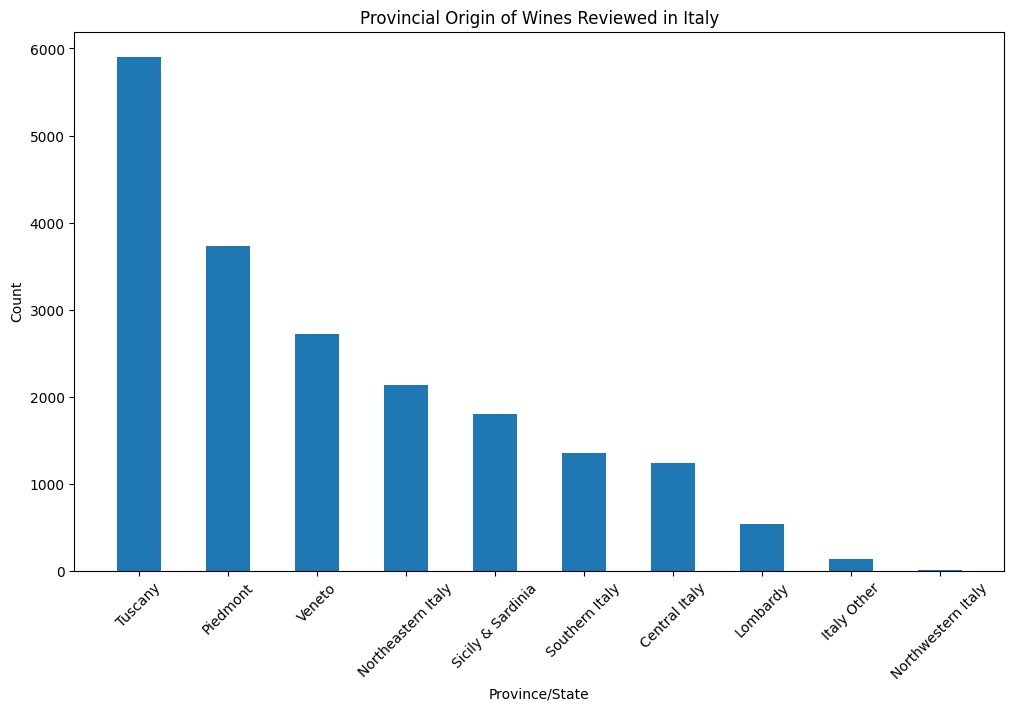

In [21]:
create_provincial_bar(taster_df, 'Italy')

In [22]:
# Show relationship between Province and Rating
italy_provinces = taster_df.copy()[taster_df.copy()['country']=='Italy']['province'].unique()

print('Province',' '*2,'|',' '*2,'Average Rating')
for province in italy_provinces:
    temp = taster_df.copy()
    temp = temp[temp['province']==province]
    province_average_rating = np.mean(temp['points'])
    print(province,' '*2, '|', ' '*2,'{:.2f}'.format(province_average_rating))

Province    |    Average Rating
Sicily & Sardinia    |    88.11
Southern Italy    |    87.84
Central Italy    |    87.39
Tuscany    |    89.07
Piedmont    |    89.54
Northeastern Italy    |    88.00
Veneto    |    87.72
Italy Other    |    88.15
Lombardy    |    88.87
Northwestern Italy    |    87.00


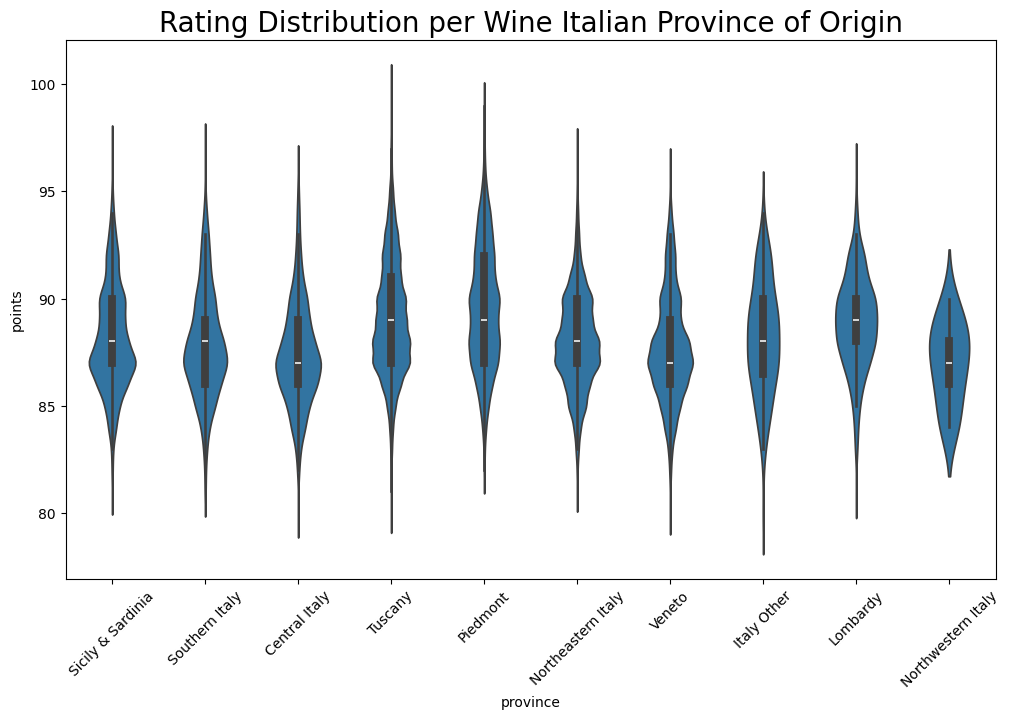

In [57]:
temp_df = taster_df.copy()[taster_df.copy()['country']=='Italy']

plt.figure(figsize=(12,7))
sns.violinplot(data = temp_df, x="province", y = "points", width=0.5)
plt.title("Rating Distribution per Wine Italian Province of Origin",fontsize=20)
plt.xticks(rotation=45)
plt.show()

### Wine Tasters

In [23]:
tasters = taster_df.copy().groupby(by = 'taster_name').size().sort_values(ascending=False)
tasters

taster_name
Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
dtype: int64

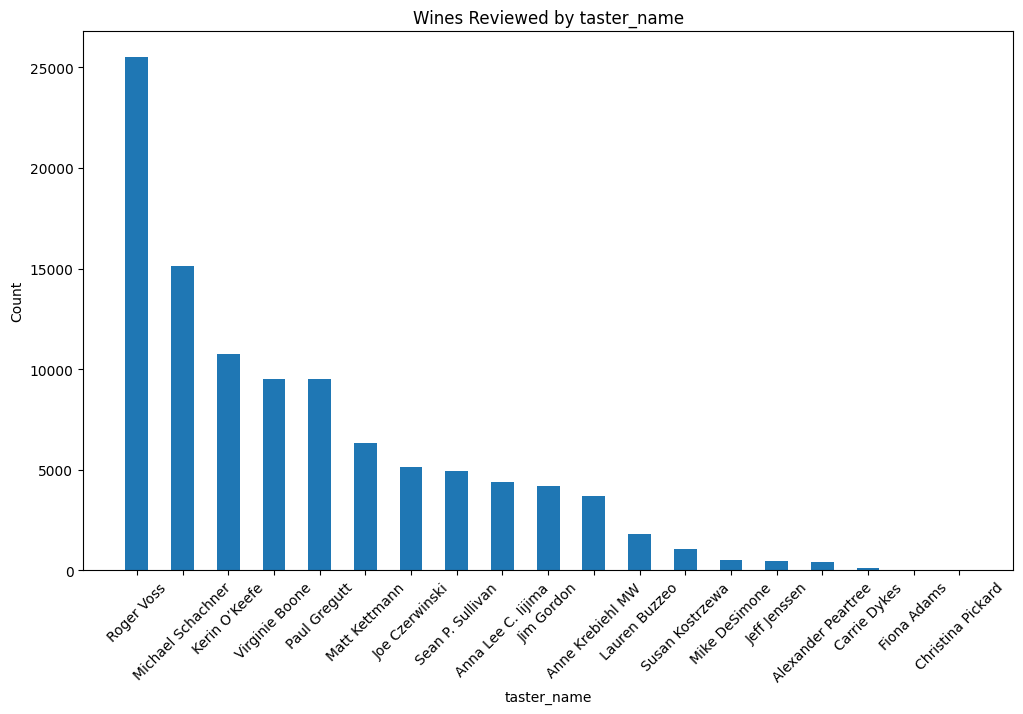

In [24]:
create_bar(taster_df, 'taster_name')

In [25]:
tasters_ratings_df = pd.DataFrame(tasters, columns=['num_reviews']).reset_index()

avg_ratings = []
for taster in tasters_ratings_df['taster_name']:
    avg_rating = taster_df.copy()[taster_df.copy()['taster_name']== taster]['points'].mean()
    avg_ratings.append(np.round(avg_rating,2))

tasters_ratings_df['avg_rating'] = avg_ratings
tasters_ratings_df

,taster_name,num_reviews,avg_rating
0,Roger Voss,25514,88.71
1,Michael Schachner,15134,86.91
2,Kerin O’Keefe,10776,88.87
3,Virginie Boone,9537,89.21
4,Paul Gregutt,9532,89.08
5,Matt Kettmann,6332,90.01
6,Joe Czerwinski,5147,88.54
7,Sean P. Sullivan,4966,88.76
8,Anna Lee C. Iijima,4415,88.42
9,Jim Gordon,4177,88.63


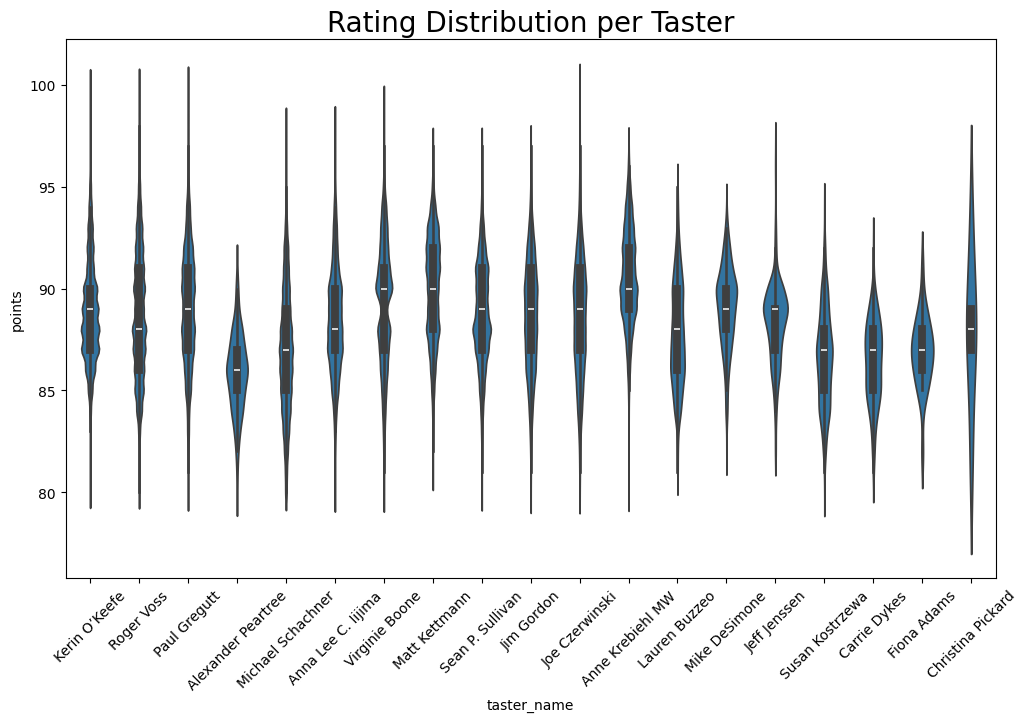

In [59]:
plt.figure(figsize=(12,7))
sns.violinplot(data = taster_df, x="taster_name", y = "points", width=0.5)
plt.title("Rating Distribution per Taster",fontsize=20)
plt.xticks(rotation=45)
plt.show()

### Varieties

In [65]:
variety = taster_df.copy().groupby(by = 'variety').size().sort_values(ascending=False)
variety[:100]

variety
Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Ribolla Gialla                 87
Arneis                         86
Godello                        81
Negroamaro                     80
Lagrein                        80
Length: 100, dtype: int64

In [66]:
top20varieties = variety[:20]
variety_ratings_df = pd.DataFrame(top20varieties, columns=['num_reviews']).reset_index()

avg_ratings = []
for variety in variety_ratings_df['variety']:
    avg_rating = taster_df.copy()[taster_df.copy()['variety']== variety]['points'].mean()
    avg_ratings.append(np.round(avg_rating,2))

variety_ratings_df['avg_rating'] = avg_ratings
variety_ratings_df

,variety,num_reviews,avg_rating
0,Pinot Noir,13272,89.41
1,Chardonnay,11753,88.34
2,Cabernet Sauvignon,9472,88.61
3,Red Blend,8946,88.38
4,Bordeaux-style Red Blend,6915,89.11
5,Riesling,5189,89.45
6,Sauvignon Blanc,4967,87.43
7,Syrah,4142,89.29
8,Rosé,3564,86.85
9,Merlot,3102,87.21


### Wineries

In [28]:
wineries = taster_df.copy().groupby(by = 'winery').size().sort_values(ascending=False)
wineries[:100]

winery
Wines & Winemakers    222
Testarossa            218
DFJ Vinhos            215
Williams Selyem       211
Louis Latour          199
                     ... 
Henri Bourgeois        75
Morgan                 75
Dry Creek Vineyard     75
Duckhorn               74
Clos La Chance         74
Length: 100, dtype: int64

In [29]:
top100wineries = wineries[:100]
winery_ratings_df = pd.DataFrame(top100wineries, columns=['num_reviews']).reset_index()

avg_ratings = []
for winery in winery_ratings_df['winery']:
    avg_rating = taster_df.copy()[taster_df.copy()['winery']== winery]['points'].mean()
    avg_ratings.append(np.round(avg_rating,2))

winery_ratings_df['avg_rating'] = avg_ratings
winery_ratings_df

,winery,num_reviews,avg_rating
0,Wines & Winemakers,222,87.60
1,Testarossa,218,90.74
2,DFJ Vinhos,215,86.67
3,Williams Selyem,211,92.74
4,Louis Latour,199,90.54
...,...,...,...
95,Henri Bourgeois,75,90.12
96,Morgan,75,89.36
97,Dry Creek Vineyard,75,89.21
98,Duckhorn,74,91.39


# Key Takeaways
- taster_df will be the training set for the recommendation system
- Will need NLP feature engineering to create a "taste profile" from each review.
- Many null values. Once first layer of feature selection is performed, will need to filter out null values.